<center><h1>TP Integrador II - CaC Big Data</h1>


<center><img src ='/work/img/dfh (1).png'></center>

In [ ]:
# Instalación de librería para leer el archivo xlsx:
!pip install openpyxl==3.0.10

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Imports de librerías a utilizar:
import numpy as np
import pandas as pd
import sqlite3 as sql3 
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Paso 1: Alcances del proyecto y obtener datos</h2>
<br>
<h3>Alcances del proyecto</h3>
<p>En este proyecto vamos a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de un mes, que nos ayudarán a responder a las preguntas: </p>
<ul>
<li>¿Cuál es el artículo más vendido? (unidades)</li>
<li>¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li>¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li>¿Hay grandes variaciones en ventas a lo largo del mes?</li>
</ul>
<p>Para este proyecto utilizaremos herramientas de Pandas para análisis exploratorio, Numpy para el análisis de ciertas columnas y Matplotlib/Seaborn para visualización de resultados.</p>
<br>
<h3>Descripción y obtención de los datos</h3>
<h4>Fuentes de datos</h4>
<ul>
<li>articles.db: BD con datos de los artículos.</li>
<li>sellers.xlsx: datos de los vendedores.</li>
<li>orders.csv: registro de las ventas de un mes.</li>
</ul>

In [ ]:
# Artículos:
conn = sql3.connect('/work/data/articles.db')
sql_query = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(sql_query, columns=['article_id', 'article_name', 'unit_price']) 
print(df_articles)

    article_id      article_name unit_price
0        20015        Smartphone     525.00
1        20016           Full Pc    2127.81
2        20017           Monitor     230.00
3        20018            Tablet     130.00
4        20019              Desk     130.10
5        20020             Chair     335.64
6        20021             Modem      67.50
7        20022    Range Extender      20.45
8        20023          Notebook    1000.00
9        20024           Netbook     145.00
10       20025               HDD      54.62
11       20026               SDD      22.00
12       20027        Ram Memory      35.95
13       20028       Motherboard     138.38
14       20029             Mouse      30.30
15       20030        Fan Cooler       4.25
16       20031            Webcam      20.07
17       20032          Keyboard      22.60
18       20033        Headphones      23.30
19       20034           Scanner     185.00
20       20035              Case      37.90
21       20036        Video Card

In [ ]:
# Vendedores:
df_sellers = pd.read_excel('/work/data/sellers.xlsx', index_col=0) 
print(df_sellers)

                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres
6           Milly Christoffe
7                 Kati Innot
8              Tobin Roselli
9               Onida Cosely
10           Cirilo Grandham
11           Vasily Danilyuk
12          Brockie Patience
13           Arnold Kilkenny
14            Janel O'Curran
15           Daisie Slograve


In [ ]:
# Órdenes:
df_orders = pd.read_csv('/work/data/orders.csv')
print(df_orders)

     order_id  week  article_id  quantity  seller_id country_name
0       15024     1       20039        10         10         Peru
1       15025     1       20029        15          5         Peru
2       15026     1       20024         5         14      Bolivia
3       15027     1       20018         9         14       Brazil
4       15028     1       20035         6         15       Mexico
..        ...   ...         ...       ...        ...          ...
995     16019     4       20021         1          7       Brazil
996     16020     4       20040        15         15       Brazil
997     16021     4       20040         2         11     Colombia
998     16022     4       20018        14         11       Brazil
999     16023     4       20026        12          9       Brazil

[1000 rows x 6 columns]


<h2>Paso 2: Explorar y preparar los datos</h2>
<br>
<h3>Exploración</h3>

In [ ]:
# Exploración del df de artículos:
print('Muestra de los datos:')
print(df_articles.head())
print('\nFormato del dataframe:') 
print(df_articles.shape) 
print('\nBúsqueda de valores nulos:')
print(df_articles.isnull().sum()) 
print('\nFormato de los datos por columna:')
print(df_articles.dtypes)

Muestra de los datos:
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Formato del dataframe:
(31, 3)

Búsqueda de valores nulos:
article_id      0
article_name    0
unit_price      0
dtype: int64

Formato de los datos por columna:
article_id       int64
article_name    object
unit_price      object
dtype: object


In [ ]:
# Exploración del df de vendedores:
print('Muestra de los datos:')
print(df_sellers.head())
print('\nFormato del dataframe:') 
print(df_sellers.shape)
print('\nBúsqueda de valores nulos:')
print(df_sellers.isnull().sum()) 
print('\nFormato de los datos por columna:')
print(df_sellers.dtypes)

Muestra de los datos:
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Formato del dataframe:
(15, 1)

Búsqueda de valores nulos:
seller_name    0
dtype: int64

Formato de los datos por columna:
seller_name    object
dtype: object


In [ ]:
# Exploración del df de órdenes:
print('Muestra de los datos:')
print(df_orders.head()) 
print('\nFormato del dataframe:') 
print(df_orders.shape) 
print('\nBúsqueda de valores nulos:')
print(df_orders.isnull().sum()) 
print('\nFormato de los datos por columna:')
print(df_orders.dtypes)

Muestra de los datos:
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Formato del dataframe:
(1000, 6)

Búsqueda de valores nulos:
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Formato de los datos por columna:
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


<h3>Preparación</h3>
<p>Encuentro un inconveniente en la columna de precios de los artículos. Necesito cambiar el formato cadena a float.</p>

In [ ]:
# Cambio del tipo de dato de unit_price a flotante:
df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)

article_id        int64
article_name     object
unit_price      float64
dtype: object


In [ ]:
# Cambio del índice del df_articles por la columna article.id:
df_articles.set_index('article_id',inplace=True) 
print(df_articles.head)

<bound method NDFrame.head of                 article_name  unit_price
article_id                              
20015             Smartphone      525.00
20016                Full Pc     2127.81
20017                Monitor      230.00
20018                 Tablet      130.00
20019                   Desk      130.10
20020                  Chair      335.64
20021                  Modem       67.50
20022         Range Extender       20.45
20023               Notebook     1000.00
20024                Netbook      145.00
20025                    HDD       54.62
20026                    SDD       22.00
20027             Ram Memory       35.95
20028            Motherboard      138.38
20029                  Mouse       30.30
20030             Fan Cooler        4.25
20031                 Webcam       20.07
20032               Keyboard       22.60
20033             Headphones       23.30
20034                Scanner      185.00
20035                   Case       37.90
20036             Video Car

<h2>Paso 3: Definir el modelo de datos</h2>
<p>Crearemos un nuevo dataframe a partir de las fuentes de datos proporcionados.</p>
<img src='/work/img/modelo.png'>

<h2>Paso 4: Correr los pipelines para modelar los datos</h2>
<p>Llamamos pipeline a una serie de procesos en el cual la salida de un proceso es la entrada que utiliza el siguiente proceso.</p>

In [ ]:
# Creación una copia del df_orders (df base):
my_df = df_orders.copy()

# Agregar algunas columnas extras que se necesitan y las llenarlas con los códigos id que las vinculan con los otros dataframes:
my_df = my_df.assign(article_name = my_df['article_id'])
my_df = my_df.assign(total_amount = my_df['article_id']) 
my_df = my_df.assign(seller_name = my_df['seller_id']) 
print(my_df.head())

   order_id  week  article_id  quantity  seller_id country_name  article_name  \
0     15024     1       20039        10         10         Peru         20039   
1     15025     1       20029        15          5         Peru         20029   
2     15026     1       20024         5         14      Bolivia         20024   
3     15027     1       20018         9         14       Brazil         20018   
4     15028     1       20035         6         15       Mexico         20035   

   total_amount  seller_name  
0         20039           10  
1         20029            5  
2         20024           14  
3         20018           14  
4         20035           15  


In [ ]:
# Reemplazo de los valores en las nuevas columnas del df:
my_df.index 
for i in range(len(my_df.index)):
    article = df_articles.loc[my_df.loc[i]['article_name']]['article_name'] 
    my_df.loc[i,'article_name'] = article 
    my_df.loc[i,'total_amount'] = my_df.loc[i,'quantity'] * df_articles.loc[my_df.loc[i]['total_amount']]['unit_price'] # Modifico la columna total_amount. La duermo una vez que la ejecuto.  
    my_df.loc[i,'seller_name'] = df_sellers.loc[my_df.loc[i]['seller_name']]['seller_name']   
print(my_df.head())

   order_id  week  article_id  quantity  seller_id country_name  \
0     15024     1       20039        10         10         Peru   
1     15025     1       20029        15          5         Peru   
2     15026     1       20024         5         14      Bolivia   
3     15027     1       20018         9         14       Brazil   
4     15028     1       20035         6         15       Mexico   

    article_name  total_amount      seller_name  
0  Water Cooling         675.0  Cirilo Grandham  
1          Mouse         454.5      Ewell Peres  
2        Netbook         725.0   Janel O'Curran  
3         Tablet        1170.0   Janel O'Curran  
4           Case         227.4  Daisie Slograve  


In [ ]:
# Eliminación de las columnas que no se van a utilizar:
my_df.drop(['order_id','article_id','seller_id'], axis='columns', inplace=True)
print(my_df.head())

   week  quantity country_name   article_name  total_amount      seller_name
0     1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1     1        15         Peru          Mouse         454.5      Ewell Peres
2     1         5      Bolivia        Netbook         725.0   Janel O'Curran
3     1         9       Brazil         Tablet        1170.0   Janel O'Curran
4     1         6       Mexico           Case         227.4  Daisie Slograve


<h2>Paso 5: Responder las preguntas</h2>


In [ ]:
# Dataframe con el que se va a trabajar:
print(my_df.head()) 

   week  quantity country_name   article_name  total_amount      seller_name
0     1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1     1        15         Peru          Mouse         454.5      Ewell Peres
2     1         5      Bolivia        Netbook         725.0   Janel O'Curran
3     1         9       Brazil         Tablet        1170.0   Janel O'Curran
4     1         6       Mexico           Case         227.4  Daisie Slograve


<h3>1. ¿Cuál es el artículo más vendido? (en unidades)</h3>

In [ ]:
# Resolución analítica:
df2 = my_df.groupby('article_name').sum() 
por_cantidad = df2.sort_values('quantity',ascending=False)
print('Artículo más vendido:') 
print(por_cantidad['quantity'].head(1))

Artículo más vendido:
article_name
HDD    413
Name: quantity, dtype: int64


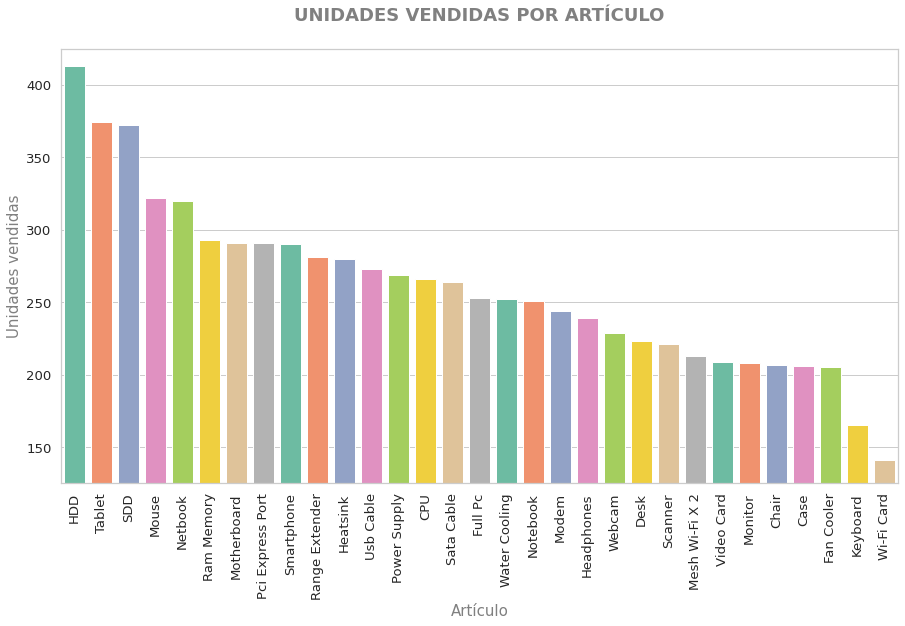

In [ ]:
# Resolución gráfica:
sns.set(style='whitegrid',font_scale=1.2)
sns.barplot(x=df2.index, y=df2['quantity'], data=df2, order=df2.sort_values('quantity', ascending=False).index,palette='Set2',saturation=0.85)
plt.xticks(rotation=90)
plt.ylim(125,425)
plt.title('UNIDADES VENDIDAS POR ARTÍCULO',fontsize=18,color='gray',fontweight="bold",y=1.05)
plt.xlabel("Artículo", fontsize=15,color='gray')
plt.ylabel("Unidades vendidas",fontsize=15,color='gray')
plt.gcf().set_size_inches(15, 8)
plt.show()

<h5><center>El artículo más vendido es HDD. Se vendieron 413 unidades de este producto.</center></h5>

<h3>2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

In [ ]:
# Resolución analítica:
df3=(my_df.groupby('article_name').sum()).sort_values('total_amount', ascending=False).head(5)
print('Artículos que más ingresos proporcionaron:')
print(df3['total_amount'])

Artículos que más ingresos proporcionaron:
article_name
Full Pc       538335.93
Notebook      251000.00
Smartphone    152250.00
Chair          69477.48
Tablet         48620.00
Name: total_amount, dtype: float64


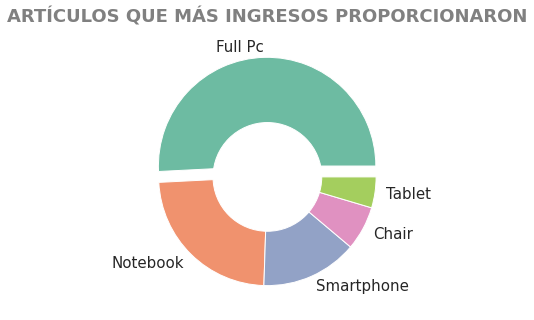

In [ ]:
# Resolución gráfica:
e= (0.1,0,0,0,0)
sns.set(font_scale=1.2)
plt.pie(x=df3['total_amount'],labels=df3.index,explode=e, colors=sns.color_palette('Set2',10,.85), textprops = {'fontsize':15}) 
cc = plt.Circle((0,0),0.5, fc='white') 
fig = plt.gcf()
fig.gca().add_artist(cc)
plt.title('ARTÍCULOS QUE MÁS INGRESOS PROPORCIONARON',fontsize=18,color='gray',fontweight="bold",y=1.05)
plt.gcf().set_size_inches(7,5)
plt.show()

<h5><center>El artículo que más ingresos proporcionó fue Full PC. En total se obtuvo una ganancia de $538335.93 con la venta de este producto.</center></h5>

<h3>3. ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

In [ ]:
# Resolución analítica:
df4 = (my_df.groupby('seller_name').sum()).sort_values('total_amount', ascending=False)
print('Mejor vendedor del mes:')
print(df4.head(1))
print()
print('Ventas de cada vendedor:')
print(df4[['quantity']+['total_amount']]) 

Mejor vendedor del mes:
                week  quantity  total_amount
seller_name                                 
Janel O'Curran   174       703     192832.47

Ventas de cada vendedor:
                   quantity  total_amount
seller_name                              
Janel O'Curran          703     192832.47
Brockie Patience        441     142709.88
Oliviero Charkham       555     141329.76
Vasily Danilyuk         521     129157.55
Daisie Slograve         554     120520.11
Aveline Swanwick        629     118874.33
Arnold Kilkenny         583      94552.04
Kati Innot              512      83704.62
Jase Doy                582      80628.31
Ewell Peres             496      78144.32
Onida Cosely            535      77373.37
Milly Christoffe        442      61733.69
Tobin Roselli           519      56984.42
Cornie Wynrehame        523      52253.57
Cirilo Grandham         470      45009.40


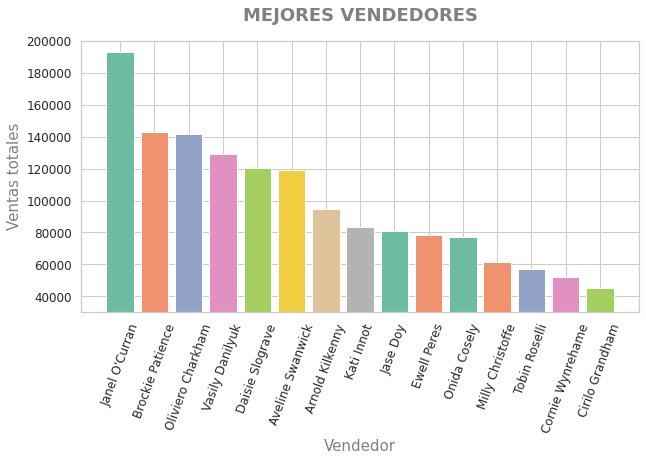

In [ ]:
# Resolución gráfica:
sns.set(style='whitegrid',font_scale=1.2)
palette_set2 = sns.color_palette("Set2",10,.85)
plt.bar(df4.index, df4['total_amount'],width=0.80,color=palette_set2)
plt.xticks(rotation=70,fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(30000,200000)
plt.title('MEJORES VENDEDORES',fontsize=18,color='gray',fontweight="bold",y=1.05)
plt.xlabel("Vendedor", fontsize=15,color='gray')
plt.ylabel("Ventas totales",fontsize=15,color='gray')
plt.gcf().set_size_inches(10, 5)
plt.show()

<h5><center>El bono por "Mejor vendedor del mes" debe otorgarse a Janel O'Curran quien vendió 703 unidades y obtuvo una ganancia de $192832.47.</center></h5>

<h3>4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4>Si es así, ¿en qué momento debería lanzar una campaña de promociones?</h4>

In [ ]:
# Resolución analítica:
df5 = (my_df.groupby('week').sum()).sort_values('total_amount', ascending=False)
print('Variaciones en ventas a lo largo del mes:')
print(df5)

Variaciones en ventas a lo largo del mes:
      quantity  total_amount
week                        
1         2449     507458.81
2         2444     415364.44
3         2114     329140.03
4         1058     223844.56


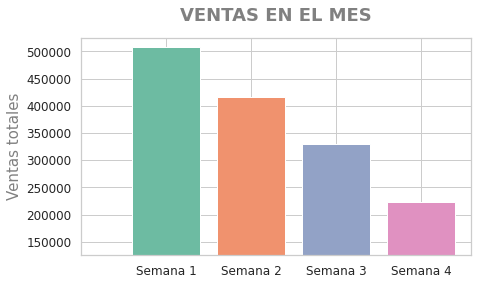

In [ ]:
# Resolución gráfica:
sns.set(style='whitegrid',font_scale=1.2)
plt.bar(df5.index, df5['total_amount'],width=0.80,color=palette_set2)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(np.arange(5),(' ','Semana 1','Semana 2','Semana 3','Semana 4'))
plt.ylim(125000,525000)
plt.title('VENTAS EN EL MES',fontsize=18,color='gray',fontweight="bold",y=1.05)
plt.xlabel(" ")
plt.ylabel("Ventas totales",fontsize=15,color='gray')
plt.gcf().set_size_inches(7,4)
plt.show()

<h5><center>Existe una tendencia a disminuir las ventas a medida que transcurre el mes. Sería conveniente lanzar una campaña de promociones en las semanas 3 o 4 para incrementar las ventas.</center></h5>

<h2>Tareas a realizar</h2>
<ul>
<li>Pensar 3 preguntas y responderlas con el método que consideres más apropiado. Al menos una de ellas debe contener la columna 'country_name' y al menos una de ellas debe buscar correlación entre dos variables categóricas.</li>
<li>Personalizar, estilar y dar contexto a las gráficas.</li>
<li>Generar un informe en el que se responda en forma coloquial a las preguntas, agregando conclusiones y consejos que puedan surgir de este trabajo. Se pueden agregar imágenes.</li>
<li>Publicar el trabajo y concretar la entrega en <a href="https://docs.google.com/forms/d/e/1FAIpQLSdiu_l6aO4tKBLiojZJp-RLF--deRAW0VM-0eqQ9tHJSD-j7A/viewform">https://docs.google.com/forms/d/e/1FAIpQLSdiu_l6aO4tKBLiojZJp-RLF--deRAW0VM-0eqQ9tHJSD-j7A/viewform</a>. <br>Deberás proporcionar link al notebook fuente y a la publicación. <br>Video/guía de cómo entregar el trabajo: <a href="https://youtu.be/FCQRhs4dxls">https://youtu.be/FCQRhs4dxls</a></li>
<li>Entregas:  4 de julio hasta 15 de julio, 2022 - 23:59 hs</li>
</ul>

<h3>5. ¿Cuáles fueron los 5 países que más compraron y cuál fue el monto total de sus compras?</h3>

In [ ]:
# Resolución analítica:
df6 = (my_df.groupby('country_name').sum()).sort_values('total_amount', ascending=False).head()
print('Países que más compraron:')
print(df6[['quantity']+['total_amount']])

Países que más compraron:
              quantity  total_amount
country_name                        
Brazil            2515     441271.85
Argentina          947     205832.78
Colombia           881     177514.29
Peru              1027     161421.12
Mexico             846     138619.99


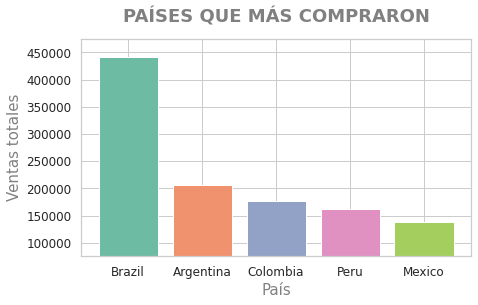

In [ ]:
# Resolución gráfica:
sns.set(style='whitegrid',font_scale=1.2)
palette_set2 = sns.color_palette("Set2",10,.85)
plt.bar(df6.index, df6['total_amount'],width=0.80,color=palette_set2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(75000,475000)
plt.title('PAÍSES QUE MÁS COMPRARON',fontsize=18,color='gray',fontweight="bold",y=1.05)
plt.xlabel("País",fontsize=15,color='gray')
plt.ylabel("Ventas totales",fontsize=15,color='gray')
plt.gcf().set_size_inches(7, 4)
plt.show()

<h5><center>Los 5 países que más compraron fueron Brasil ($441271.85), Argentina ($205832.78), Colombia, ($177514.29), Perú ($161421.12) y México ($138619.99).</center></h5>

<h3>6. ¿Notebooks o CPUs? ¿Cuáles adquirieron más los 5 países que más compraron?</h3>

In [ ]:
# Resolución analítica:
df7 = my_df[(my_df['country_name']=='Brazil') | (my_df['country_name']=='Argentina')| (my_df['country_name']=='Colombia')| (my_df['country_name']=='Peru')| (my_df['country_name']=='Mexico')] 
df8 = df7[(df7['article_name']== 'Notebook') | (df7['article_name']=='CPU')]
df9 = df7[(df7['article_name']== 'Notebook')]
df10 = df7[(df7['article_name']== 'CPU')]
df11 = (df9.groupby('country_name').sum()).sort_values('quantity', ascending=False).head()
print('Notebooks compradas:')
print(df11[['quantity']])
print()
df12 = (df10.groupby('country_name').sum()).sort_values('quantity', ascending=False).head()
print('CPUs compradas:')
print(df12[['quantity']])

Notebooks compradas:
              quantity
country_name          
Brazil              83
Mexico              44
Argentina           43
Peru                32
Colombia            18

CPUs compradas:
              quantity
country_name          
Argentina          104
Brazil              82
Mexico              19
Colombia            17
Peru                16


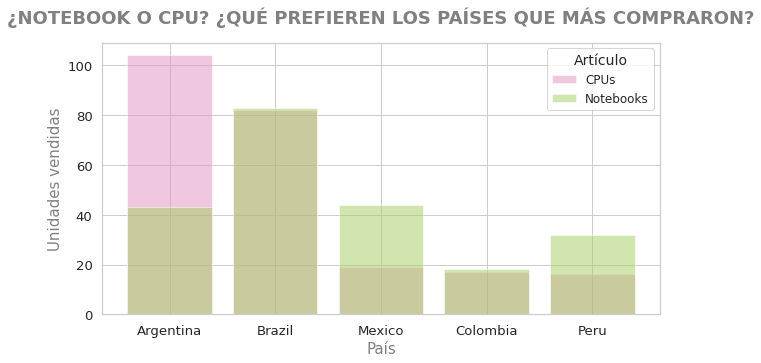

In [ ]:
sns.set(style='whitegrid',font_scale=1.2)
palette_set2 = sns.color_palette("Set2",10,.85)
color = sns.color_palette([palette_set2[3]])
color2 = sns.color_palette([palette_set2[4]])
plt.bar(df12.index, df12['quantity'], label='CPUs', alpha=0.5,width=0.80,color=color)
plt.bar(df11.index, df11['quantity'], label='Notebooks', alpha=0.5,width=0.80,color=color2)
plt.title('¿NOTEBOOK O CPU? ¿QUÉ PREFIEREN LOS PAÍSES QUE MÁS COMPRARON?',fontsize=18,color='gray',fontweight="bold",y=1.05)
plt.ylabel("Unidades vendidas",fontsize=15,color='gray')
plt.xlabel("País",fontsize=15,color='gray')
plt.legend(title = "Artículo",title_fontsize = 14,fontsize=12)
plt.gcf().set_size_inches(10, 5)
plt.show()

<h5><center>Argentina compró preferencialmente CPUs, mientras que Brasil y Colombia compraron ambos productos de forma proporcional. Por su parte, Perú y México compraron pincipalmente Notebooks.</center></h5>

<h3>7. Se planea que Kati Innot haga un viaje a los países con los que más comercia para reunirse con sus clientes. ¿Con qué 5 países comerció más Kati Innot? ¿A qué país/es debería viajar?</h3>

In [ ]:
df13 = my_df[(my_df['seller_name']=='Kati Innot')] 
df14 = (df13.groupby('country_name').sum()).sort_values('total_amount', ascending=False).head()
print('Países con los que más comerció Kati Innot:')
print(df14[['total_amount']])

Países con los que más comerció Kati Innot:
              total_amount
country_name              
Brazil            32087.32
Mexico            12752.13
Bolivia           10750.37
Colombia          10502.57
Argentina          5672.06


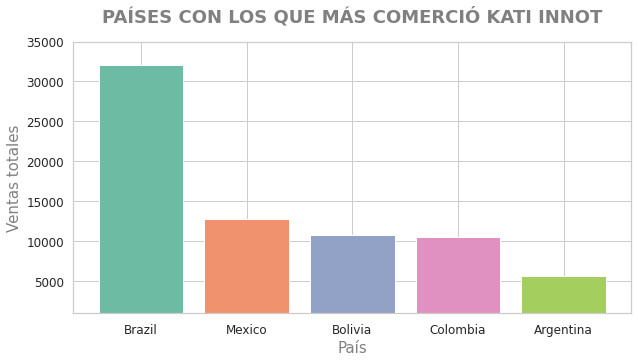

In [ ]:
# Resolución gráfica:
sns.set(style='whitegrid',font_scale=1.2)
palette_set2 = sns.color_palette("Set2",10,.85)
plt.bar(df14.index, df14['total_amount'],width=0.80,color=palette_set2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(1000,35000)
plt.title('PAÍSES CON LOS QUE MÁS COMERCIÓ KATI INNOT',fontsize=18,color='gray',fontweight="bold",y=1.05)
plt.xlabel("País",fontsize=15,color='gray')
plt.ylabel("Ventas totales",fontsize=15,color='gray')
plt.gcf().set_size_inches(10, 5)
plt.show()

<h5><center>Los países con los que más comerció Kati Innot fueron Brasil ($32087.32), México ($12752.13), Bolivia ($10750.37), Colombia ($10502.57) y Argentina ($5672.06).</center></h5>

<h2>Conclusiones y propuestas</h2>
<h3>Artículos que más unidades vendieron</h3>
<h5 align="justify">Observando el gráfico de unidades vendidas por artículo, se puede apreciar que el artículo que más se vendió fue HDD (413 unidades), seguido por Tablet (374 unidades) y por SDD (372 unidades). También, se puede determinar que el artículo más vendido, HDD, se vendió aproximadamente tres veces más que el artículo menos vendido, Wi-Fi Card (141 unidades).</h5>
<h3>Artículos que más ingresos proporcionaron</h3>
<h5 align="justify">El artículo que más ingresos proporcionó fue Full PC($538336). Este artículo generó aproximadamente el doble de igresos que el segundo artículo que más ingresos generó, Notebook ($251000).</h5>
<center><img src='/work/img/istockphoto-95722707-612x612.jpg'width='500'></center>
<h3>Mejor vendedor del mes</h3>
<h5 align="justify">El mejor vendedor del mes, y a quién debería otorgársele el bono, fue Janel O'Curran, quien generó una ganancia de $192832.47 con la venta de 703 unidades. Janel O'Curran vendió casi el doble de artículos que Cirilo Grandham, el peor vendedor del mes, quien tuvo una ganancia de $45009.40. Se puede apreciar también que Janel O'Curran obtuvo una mayor ganancia por cada unidad vendida en comparación con Cirilio Grandham, lo cual también es un gran logro a tener en cuenta. </h5>
<h3>Variaciones en ventas a lo largo del mes</h3>
<h5 align="justify">Se puede observar que hay grandes variaciones en ventas a lo largo del mes. La mayor cantidad de ventas se realizan en la semana 1 ($507458.81), seguida por la semana 2 ($415364.44), la semana 3($329140.03) y finalmente la semana 4 ($223844.56). Se puede apreciar cómo las ventas disminuyen a lo largo del transcurso del mes. Entonces, sería conveniente lanzar una campaña de promociones en la tercera o cuarta semana para incrementar las ventas.</h5>
<h3>Países que más compraron</h3>
<h5 align="justify">Los 5 países que más compraron fueron Brasil ($441271.85), seguido por Argentina ($205832.78), Colombia ($177514.29), Perú ($161421.12) y México ($138619.99). Se puede apreciar como el país que más compró, Brasil, lo hizo por un monto mucho mayor, aproximadamente el doble, que el segundo país que más compró, Argentina. Entonces, Brasil se destaca como el mejor cliente.</h5>
<h3>¿Notebooks o CPUs? ¿Qué adquirieron más los 5 países que más compraron?</h3>
<h5 align="justify">Se observa una tendencia dispareja entre los distintos países. Argentina compró más del doble de CPUs que de Notebooks. Por su parte, Brasil y Colombia compraron propociones similares. En cambio,  Perú y México compraron casi el doble de Notebooks que de CPUs. Entonces, a excepción de Argentina, el mercado de Notebooks es más importante o similar al mercado de CPUs.</h5>
<center><img src='/work/img/desktop-computer-vs-laptop-680x360-2-20220711-182448.jpg'width='500'></center>
<h3>Países a los que debería viajar Katie Innot para reunirse con sus clientes</h3>
<h5 align="justify">Katie Innot comerció principalmente con Brasil ($32087.32), quien es nuestro mejor cliente. En total Katie Innot representa aproximadamente el 7% de las ventas que se hicieron con Brasil. También, en menor medida (menos de la mitad) tuvo ventas en México ($12752.13), Bolivia ($10750.37), Colombia ($10502.57) y Argentina ($5672.06). Entonces, sería conveniente que Katie Innot viaje a Brasil. Además, podría visitar Bolivia ya que son países cercanos y tuvo ventas importantes allí.</h5>
<center><img src='/work/img/bandera-de-brasil-e1650383994883.jpg'width='500'></center>

<h5 align="right" style="color:#717171"><i>Realizado por Melisa Rossi para Codo a Codo 4.0 (11 de junio del 2022)</i></h5>


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba95f8d2-7267-49c4-97f7-c70b16079419' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>